In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("data/train_small.csv", header=0)

array([[<AxesSubplot:title={'center':'1.0'}>,
        <AxesSubplot:title={'center':'2.0'}>],
       [<AxesSubplot:title={'center':'3.0'}>, <AxesSubplot:>]],
      dtype=object)

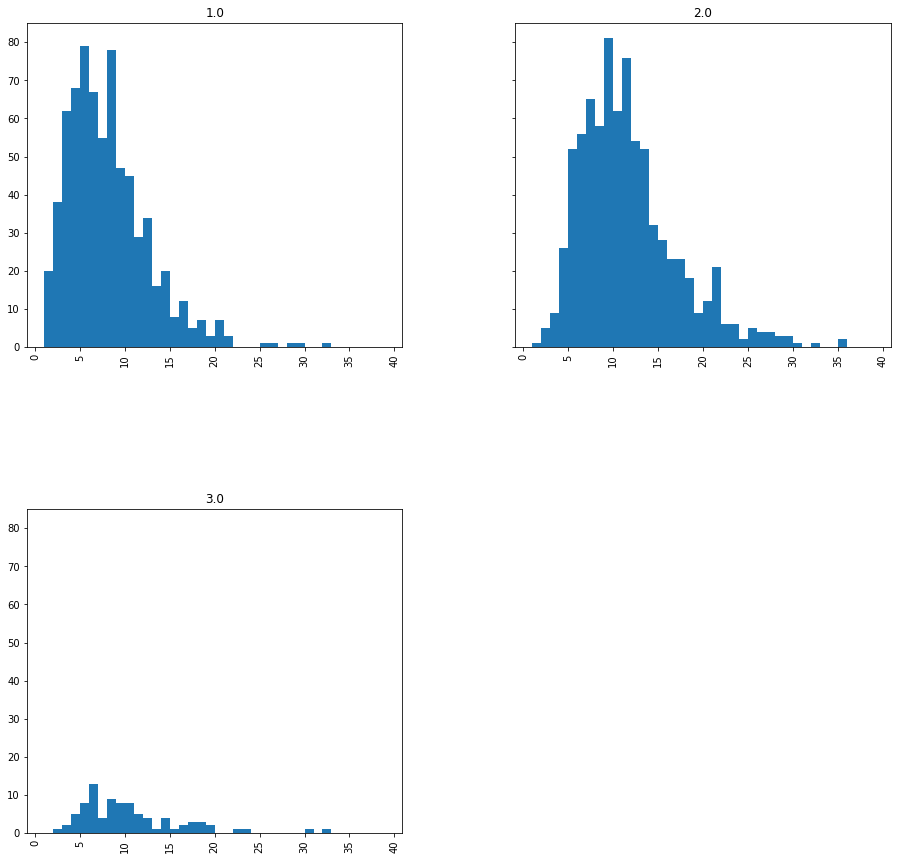

In [3]:
train['n_steps'].hist(by=train['duration_label'], bins=[i for i in range(1, 40)], figsize=(15,15), sharey=True)

array([[<AxesSubplot:title={'center':'1.0'}>,
        <AxesSubplot:title={'center':'2.0'}>],
       [<AxesSubplot:title={'center':'3.0'}>, <AxesSubplot:>]],
      dtype=object)

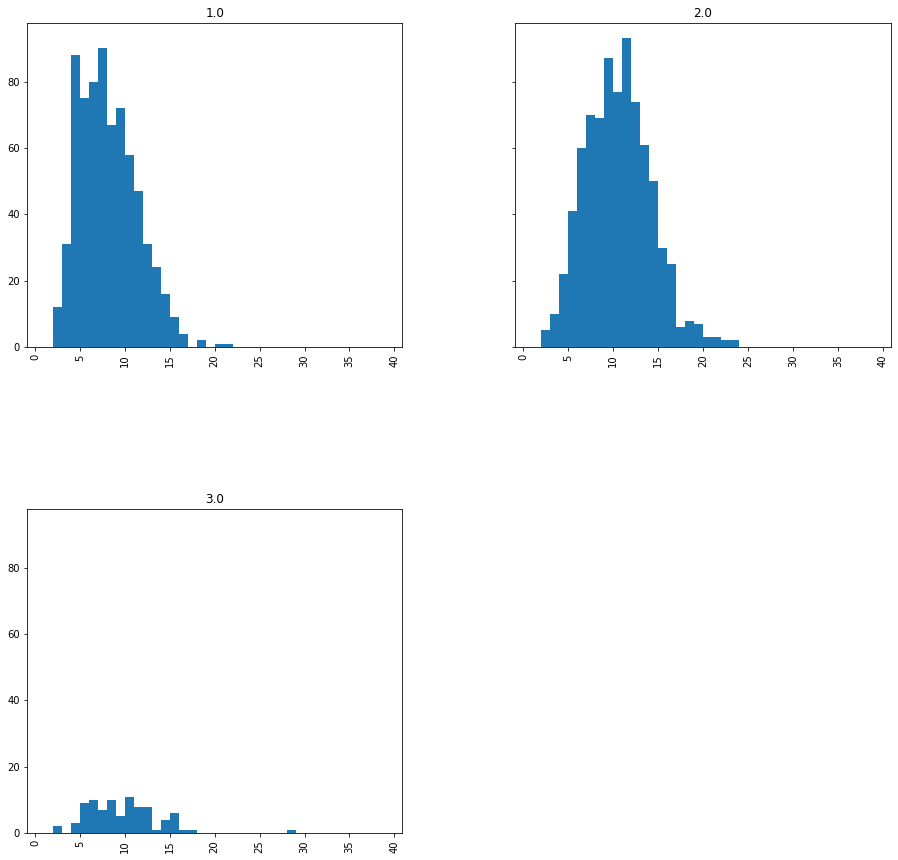

In [4]:
train['n_ingredients'].hist(by=train['duration_label'], bins=[i for i in range(1, 40)], figsize=(15,15), sharey=True)

array([[<AxesSubplot:title={'center':'1.0'}>,
        <AxesSubplot:title={'center':'2.0'}>],
       [<AxesSubplot:title={'center':'3.0'}>, <AxesSubplot:>]],
      dtype=object)

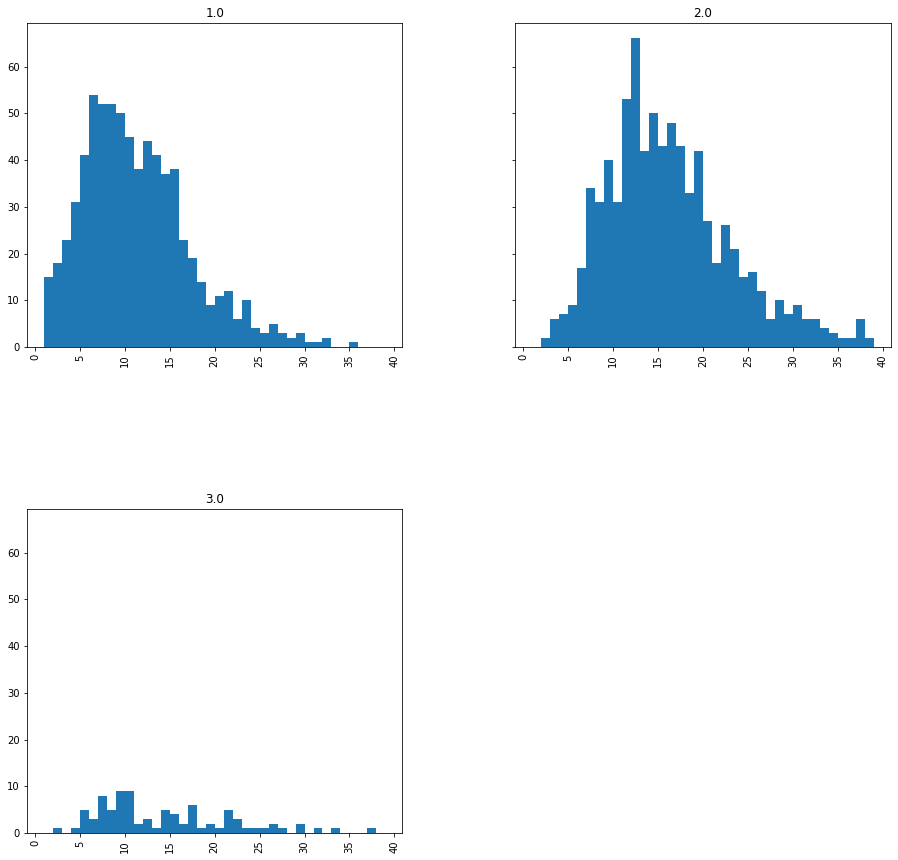

In [5]:
train['n_verbs'].hist(by=train['duration_label'], bins=[i for i in range(1, 40)], figsize=(15,15), sharey=True)